In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import statsmodels.api as sm
from time import time
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
ccdefault=pd.read_csv('../data//UCI_Credit_Card.csv')
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)


In [3]:
mcc = ccdefault.copy()
# Y Response variable dataframe
mcc_Y = mcc['DEFAULT']

# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['DEFAULT'],axis=1)
# Create inci_X Explanatory Variables DF to support the individual models
mcc_X = mcredit
mcc_X_knn = mcredit.copy()
mcc_X_nb = mcredit.copy()

In [4]:
cc = ccdefault.copy() # taking a copy in memory
if 'DEFAULT' in cc:
    y = cc['DEFAULT'].values
    #del cc['ID']
    del cc['DEFAULT']
    del cc['BILL_AMT1']
    del cc['BILL_AMT2']
    del cc['BILL_AMT3']
    del cc['BILL_AMT4']
    del cc['BILL_AMT5']
    del cc['BILL_AMT6']
    X = cc.values
num_cv_iterations = 5
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8)
TRAIN: [28976 29616 20315 ...  6063 16283 15621] TEST: [ 6669  6830 16516 ... 16163  1990  7999]
TRAIN: [11237  9898 17028 ...  1265   611  7250] TEST: [ 4174 19421 15502 ... 19995  6124 25090]
TRAIN: [23721 14143  5492 ...  4346  5119 23351] TEST: [21778  4074 19546 ...   941 14061 13584]
TRAIN: [19706  2009 13912 ...  3924 20112 21366] TEST: [ 7136 15572 21097 ... 24126  8440  7078]
TRAIN: [ 5794  1831 15948 ... 18673 15962 17274] TEST: [17565 28798 29978 ... 10151 11434 21212]


In [5]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)


X_train_scaled1 = scl_obj.fit_transform(X_train) # apply to training
X_test_scaled1 = scl_obj.fit_transform(X_test) # apply those means and std to the test set (without snooping at the test set values)



In [6]:
decision_tree =  DecisionTreeClassifier( ) # get object, the 'C' value is less (can you guess why??)
decision_tree.fit(X_train_scaled,y_train)  # train object

y_hat = decision_tree.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

# sort these attributes and spit them out
zip_vars = zip(decision_tree.feature_importances_ ,cc.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

accuracy: 0.7256666666666667
[[3786  887]
 [ 759  568]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.39      0.43      0.41      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.73      0.73      6000

PAY_4 has weight of 0.01167095967658918
PAY_5 has weight of 0.012984124799749804
PAY_6 has weight of 0.013479873812345868
PAY_3 has weight of 0.013780884711790746
MARRIAGE has weight of 0.014537195603069595
SEX has weight of 0.015256296972886442
EDUCATION has weight of 0.020082803767529064
PAY_2 has weight of 0.03897264976306406
PAY_AMT5 has weight of 0.0569751062253815
PAY_AMT6 has weight of 0.06353963397936017
LIMIT_BAL has weight of 0.06475827039105185
PAY_AMT4 has weight of 0.06488530865721555
PAY_AMT1 has weight of 0.07057625929460928
PAY_AMT3 has weight of 0.07857615995140432
PAY_AMT2 has weight of 0.083

In [7]:
# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
#WARNING: THE FIRST WIEGHT WAS 1 
iter_num=0
times_rec=[]
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
     #we count the time in executing the logistic regression
    t0 = time()
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train,y_train)  # train object
    y_hat = decision_tree.predict(X_test) # get test set precitions
    
    t1=time()
    diff=np.array([t1-t0])
    
    print ("The time it takes to fit and predict is " + str(diff[0]) + "\n")    
    times_rec=np.append(times_rec,diff)
    

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
    ClassReport = mt.classification_report(y_test,y_hat)
    print(ClassReport)
    
    iter_num+=1
    
    
print("The average time to fit and predict 3 Decision Tree classifiers  with 80/20 training/test split is: " + str(times_rec.mean()) )

The time it takes to fit and predict is 0.31723976135253906

====Iteration 0  ====
accuracy 0.729
confusion matrix
 [[3827  846]
 [ 780  547]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4673
           1       0.39      0.41      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.73      0.73      0.73      6000

The time it takes to fit and predict is 0.2820451259613037

====Iteration 1  ====
accuracy 0.719
confusion matrix
 [[3774  899]
 [ 787  540]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.38      0.41      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6

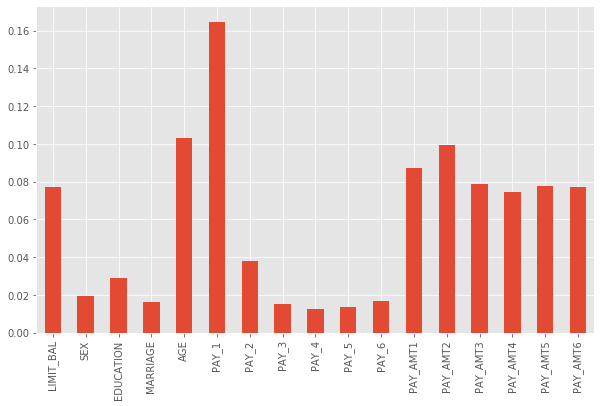

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,6))
weights = pd.Series(decision_tree.feature_importances_,index=cc.columns)
weights.plot(kind='bar')
plt.show()

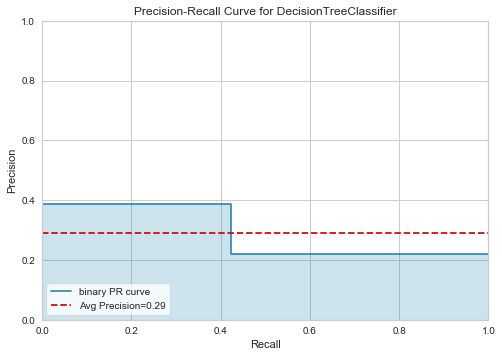

In [8]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(decision_tree)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

confusion matrix For decision tree model 


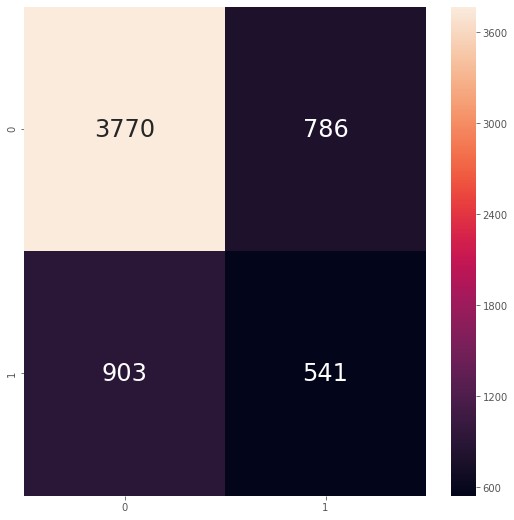

In [47]:
cm = confusion_matrix(y_hat, y_test)
plt.figure(figsize=(9,9))
print ('confusion matrix For decision tree model ')
#print(cm)
sns.heatmap(cm, annot= True, annot_kws={"size": 24}, fmt = 'd')


In [48]:
decision_tree =  DecisionTreeClassifier( class_weight='balanced') # get object, the 'C' value is less (can you guess why??)
decision_tree.fit(X_train_scaled,y_train)  # train object

y_hat = decision_tree.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

# sort these attributes and spit them out
zip_vars = zip(decision_tree.feature_importances_ ,cc.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

accuracy: 0.7316666666666667
[[3859  814]
 [ 796  531]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4673
           1       0.39      0.40      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000

PAY_5 has weight of 0.008684166249472533
SEX has weight of 0.011268966050718691
MARRIAGE has weight of 0.012684918400488675
PAY_3 has weight of 0.013073220854941999
PAY_6 has weight of 0.01325084278585652
PAY_2 has weight of 0.014433465080084832
PAY_4 has weight of 0.014786225349526994
EDUCATION has weight of 0.023799722099037534
PAY_AMT5 has weight of 0.06179939623520834
PAY_AMT6 has weight of 0.06715006206597386
PAY_AMT3 has weight of 0.06722150511979126
LIMIT_BAL has weight of 0.07099889840996683
PAY_AMT4 has weight of 0.07507594218638862
PAY_AMT1 has weight of 0.07830626143226961
AGE has weight of 0.082962

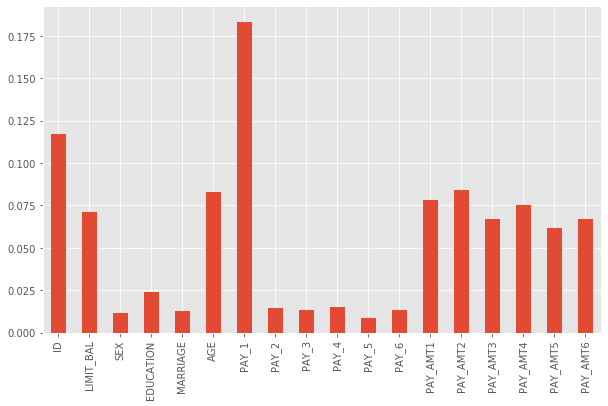

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,6))
weights = pd.Series(decision_tree.feature_importances_,index=cc.columns)
weights.plot(kind='bar')
plt.show()

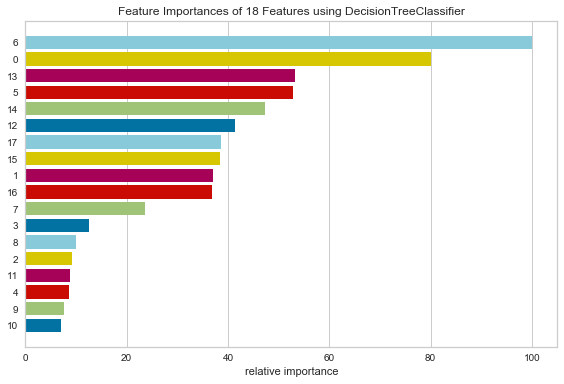

In [10]:
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set

viz = FeatureImportances(decision_tree)
viz.fit(X_train_scaled,y_train)
viz.show()

confusion matrix For decision tree model 


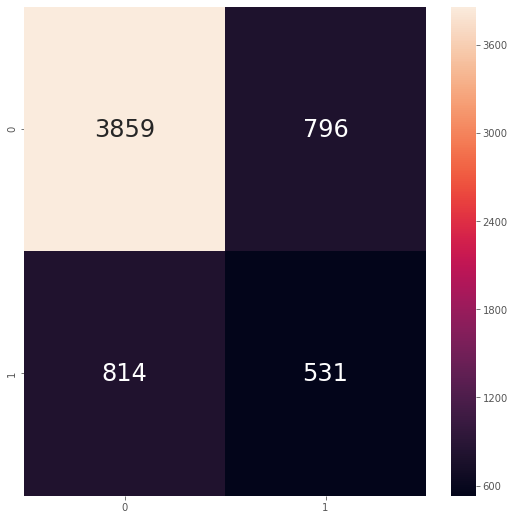

In [50]:
cm = confusion_matrix(y_hat, y_test)
plt.figure(figsize=(9,9))
print ('confusion matrix For decision tree model ')
#print(cm)
sns.heatmap(cm, annot= True, annot_kws={"size": 24}, fmt = 'd')
